In [1]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [3]:
from plotting_functions import * 

# Load data
ysgdp = LoadMLData(os.path.join(DATAPATH, "ystr_validation", "ystrs_sgdp_ml.tab"))
ysgdp["strsd2"] = ysgdp.apply(lambda x: (2-x.est_pgeom_ml)/x.est_pgeom_ml**2, 1)
ysgdp["est_beta_ml_eff"] = ysgdp.apply(lambda x: x.est_beta_ml/x.strsd2, 1)
y1kg = LoadMLData(os.path.join(DATAPATH, "ystr_validation", "ystrs_1kg_ml.tab"))
y1kg["chrom"] = "Y"
y1kg["strsd2"] = y1kg.apply(lambda x: (2-x.est_pgeom_ml)/x.est_pgeom_ml**2, 1)
y1kg["est_beta_ml_eff"] = y1kg.apply(lambda x: x.est_beta_ml/x.strsd2, 1)
truth = pd.read_csv(os.path.join("../analyses/ystr_validation/ystrs_literature_mutrates.tab"), sep="\t")

# Merge
data = pd.merge(ysgdp, truth, on=["chrom","start","end"], how="outer")
data = pd.merge(data, y1kg, on=["chrom","start","end"])
data["sgdp_strsd2"] = data.apply(lambda x: (2-x.sgdp_pgeom)/x.sgdp_pgeom**2, 1)
data["sgdp_beta_eff"] = data.apply(lambda x: x.sgdp_beta/x.sgdp_strsd2, 1)

# Scale to have same mean
kgscale = np.mean(10**(data["est_logmu_ml_x"]))/np.mean(10**(data["est_logmu_ml_y"]))
muteascale = np.mean(10**(data["est_logmu_ml_x"]))/np.mean(10**(data["log10_sgdp_mu"]))
bscale = np.mean(10**(data["est_logmu_ml_x"]))/np.mean(10**(data["ballantyne_logmu"]))
data["est_logmu_ml_y"] = data["est_logmu_ml_y"] + np.log10(kgscale)
data["log10_sgdp_mu"] = data["log10_sgdp_mu"] + np.log10(muteascale)
data["ballantyne_logmu"] = data["ballantyne_logmu"] + np.log10(bscale)
print "scales", kgscale, muteascale, bscale

scales 0.648500299811 0.52289566619 0.407393637127


mu: est_logmu_ml_x vs. est_logmu_ml_y (0.90350469726844429, 1.5263000780499208e-18) 48
beta: est_beta_ml_eff_x vs. est_beta_ml_eff_y (0.59035222216834982, 1.0030238981769413e-05) 48
mu: est_logmu_ml_x vs. ballantyne_logmu (0.77915742280551759, 1.968690460711811e-09) 41


(<matplotlib.figure.Figure at 0x10a76dd10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a775d50>)

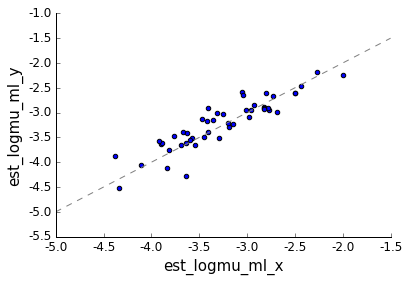

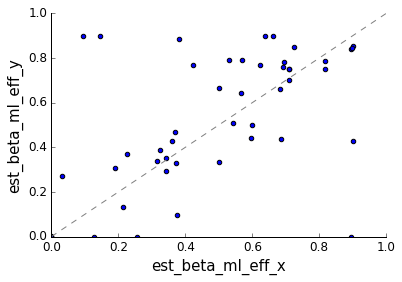

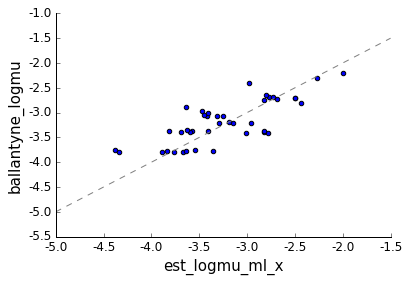

In [6]:
CompareMu(data, "est_logmu_ml_x","est_logmu_ml_y", figname=os.path.join(PLOTDIR,"SupplementalFigure6_ystrs_sgdp_ml_vs_1kg_mu.pdf")) # SGDP ML vs. 1kg
CompareBeta(data, "est_beta_ml_eff_x","est_beta_ml_eff_y", figname=os.path.join(PLOTDIR,"SupplementalFigure6_ystrs_sgdp_ml_vs_1kg_beta.pdf")) # SGDP ML vs. 1kg
CompareMu(data, "est_logmu_ml_x","ballantyne_logmu", figname=os.path.join(PLOTDIR,"SupplementalFigure6_ystrs_ballantyne.pdf")) # SGDP ML vs. 1kg

In [7]:
# Get correlation values for figure 
# Have: SGDPML, SGDP1kg, MUTEASGDP, MUTEA1KG, Ballantyne
CompareMu(data, "est_logmu_ml_x","log10_sgdp_mu", plot=False) # SGDP ML vs. MUTEASGDP
CompareMu(data, "est_logmu_ml_x","log10_1kg_mu", plot=False) # SGDP ML vs. MUTEA1kg
CompareMu(data, "est_logmu_ml_x","est_logmu_ml_y", plot=False) # SGDP ML vs. 1kg
CompareMu(data, "est_logmu_ml_x","ballantyne_logmu", plot=False) # SGDP ML vs. Ballantyne

CompareMu(data, "est_logmu_ml_y","log10_sgdp_mu", plot=False) # 1kg ML vs. MUTEASGDP
CompareMu(data, "est_logmu_ml_y","log10_1kg_mu", plot=False) # 1kg ML vs. MUTEA1kg
CompareMu(data, "est_logmu_ml_y","ballantyne_logmu", plot=False) # 1kg ML vs. ballantyne

CompareMu(data, "log10_sgdp_mu","log10_1kg_mu", plot=False) # MUTEASGDP vs. MUTEA1kg
CompareMu(data, "log10_sgdp_mu","ballantyne_logmu", plot=False) # MUTEASGDP vs. Ballantyne

CompareMu(data, "log10_1kg_mu","ballantyne_logmu", plot=False) # MUTEA1kg vs. Ballantyne

mu: est_logmu_ml_x vs. log10_sgdp_mu (0.89111973571471736, 5.854787211208951e-15) 41
mu: est_logmu_ml_x vs. log10_1kg_mu (0.87884858122789689, 4.1921350947691683e-14) 41
mu: est_logmu_ml_x vs. est_logmu_ml_y (0.90350469726844429, 1.5263000780499208e-18) 48
mu: est_logmu_ml_x vs. ballantyne_logmu (0.77915742280551759, 1.968690460711811e-09) 41
mu: est_logmu_ml_y vs. log10_sgdp_mu (0.82542459020409775, 3.1432956832099631e-11) 41
mu: est_logmu_ml_y vs. log10_1kg_mu (0.83758064600050208, 8.6384992741024711e-12) 41
mu: est_logmu_ml_y vs. ballantyne_logmu (0.76310289405067677, 6.6079190689698117e-09) 41
mu: log10_sgdp_mu vs. log10_1kg_mu (0.96985745956806857, 1.5912401200910107e-25) 41
mu: log10_sgdp_mu vs. ballantyne_logmu (0.83165293818512243, 6.072668728988489e-10) 35
mu: log10_1kg_mu vs. ballantyne_logmu (0.82415760095570878, 1.1742659449710633e-09) 35
